# 비지도학습 실습 - Hierarchical Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs, load_iris
from sklearn.datasets import load_iris
from sklearn.metrics import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## blobs dataset example

In [2]:
X, y = make_blobs(random_state=1)
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (100, 2)
y.shape: (100,)


In [3]:
print(y)

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


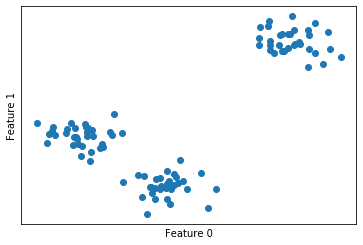

In [4]:
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.xticks(())
plt.yticks(())

plt.show()

In [5]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [6]:
assignments_X = agg.labels_
print(assignments_X)

[0 2 2 2 1 1 1 2 0 0 2 2 1 0 1 1 1 0 2 2 1 2 1 0 2 1 1 0 0 1 0 0 1 0 2 1 2
 2 2 1 1 2 0 2 2 1 0 0 0 0 2 1 1 1 0 1 2 2 0 0 2 1 1 2 2 1 0 1 0 2 2 2 1 0
 0 2 1 1 0 2 0 2 2 1 0 0 0 0 2 0 1 0 0 2 2 1 1 0 1 0]


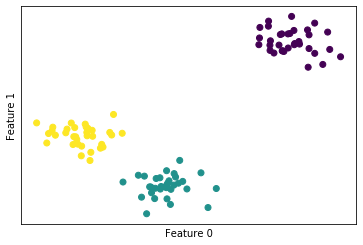

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=assignments_X)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

plt.xticks(())
plt.yticks(())

plt.show()

## iris dataset example

In [8]:
iris = load_iris()
X, y = iris.data, iris.target
print('X.shape:', X.shape)
print('y.shape:', y.shape)

X.shape: (150, 4)
y.shape: (150,)


In [9]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


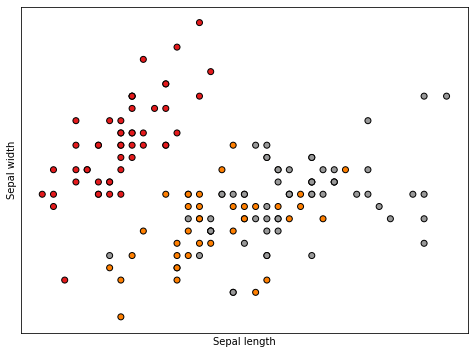

In [10]:
plt.figure(1, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
agg = AgglomerativeClustering(n_clusters=3).fit(X)
agg.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=3)

In [12]:
assignments_X = agg.labels_
print(assignments_X)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


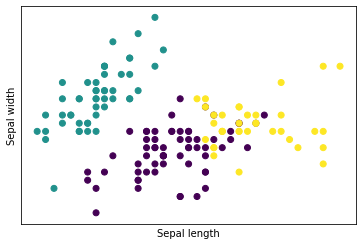

In [13]:
plt.scatter(X[:, 0], X[:, 1], c=assignments_X)

plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xticks(())
plt.yticks(())

plt.show()

## Linkage method 비교

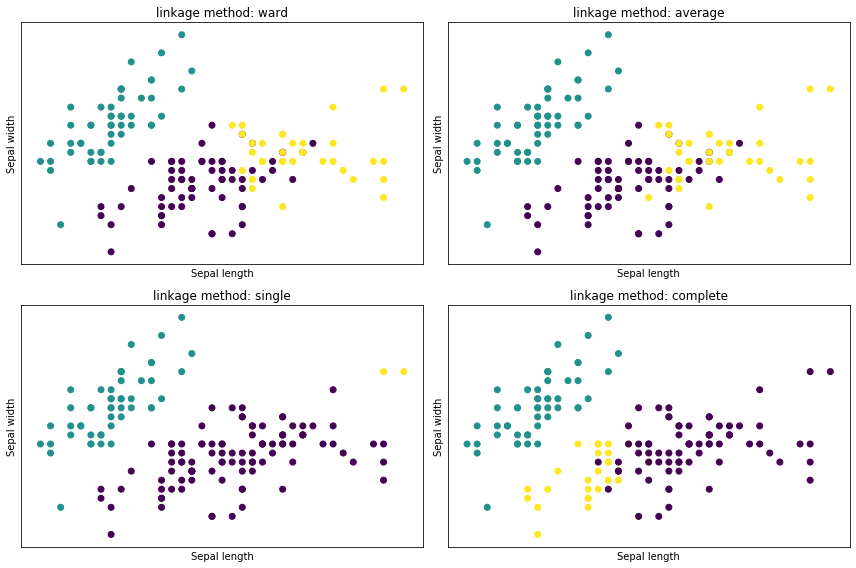

In [14]:
clustering_ari = []

linkage_settings = ['ward', 'average', 'single', 'complete']

pos = [221, 222, 223, 224]
plt.figure(figsize=(12, 8))

i = 0
for linkage in linkage_settings:
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    agg.fit(X)
    assignments_X = agg.labels_
    clustering_ari.append(adjusted_rand_score(y, assignments_X))
    
    plt.subplot(pos[i])
    plt.scatter(X[:, 0], X[:, 1], c=assignments_X)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xticks(())
    plt.yticks(())
    
    plt.title('linkage method: '+linkage)
    
    i = i + 1

plt.tight_layout()
plt.show()

In [15]:
result_df = pd.DataFrame({
        'linkage method': linkage_settings,
    'ARI': clustering_ari,
})

In [16]:
result_df

,linkage method,ARI
0,ward,0.731199
1,average,0.759199
2,single,0.563751
3,complete,0.642251


## Scaling 적용

### Standard scaling

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

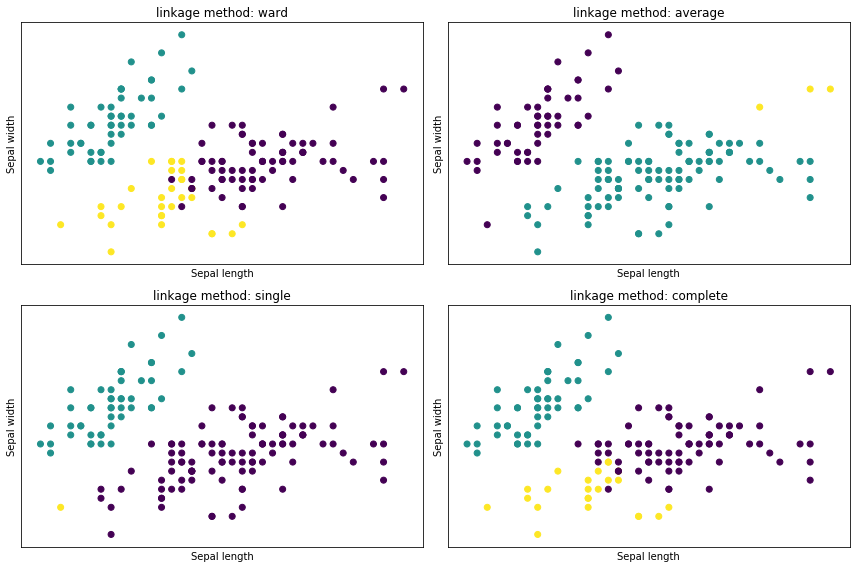

In [18]:
clustering_ari_standard = []

linkage_settings = ['ward', 'average', 'single', 'complete']

pos = [221, 222, 223, 224]
plt.figure(figsize=(12, 8))

i = 0
for linkage in linkage_settings:
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    agg.fit(X_scaled)
    assignments_X = agg.labels_
    clustering_ari_standard.append(adjusted_rand_score(y, assignments_X))
    
    plt.subplot(pos[i])
    plt.scatter(X[:, 0], X[:, 1], c=assignments_X)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xticks(())
    plt.yticks(())
    
    plt.title('linkage method: '+linkage)
    
    i = i + 1

plt.tight_layout()
plt.show()

In [19]:
result_df = pd.DataFrame({
        'linkage method': linkage_settings,
    'ARI': clustering_ari_standard,
})

In [20]:
result_df

,linkage method,ARI
0,ward,0.615323
1,average,0.562136
2,single,0.558371
3,complete,0.572631


### Minmax scaling

In [21]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

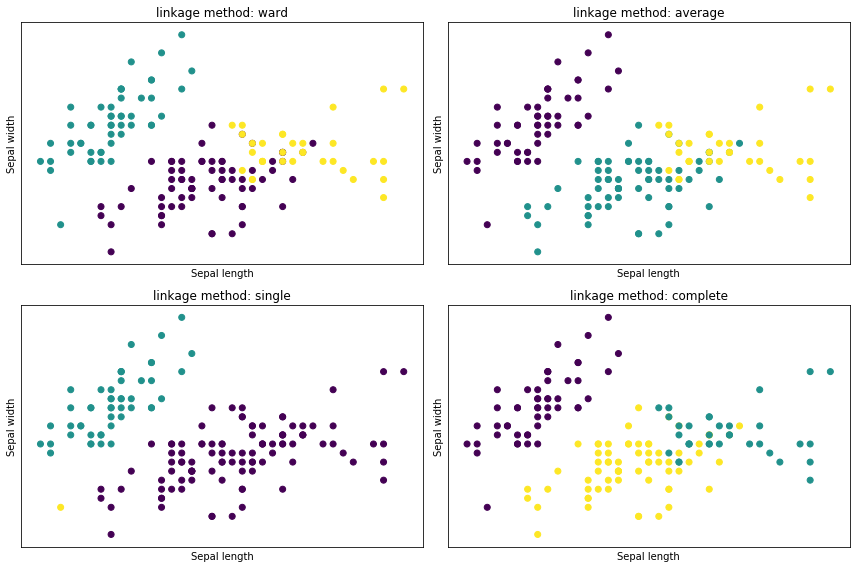

In [22]:
clustering_ari_minmax = []

linkage_settings = ['ward', 'average', 'single', 'complete']

pos = [221, 222, 223, 224]
plt.figure(figsize=(12, 8))

i = 0
for linkage in linkage_settings:
    agg = AgglomerativeClustering(n_clusters=3, linkage=linkage)
    agg.fit(X_scaled)
    assignments_X = agg.labels_
    clustering_ari_minmax.append(adjusted_rand_score(y, assignments_X))
    
    plt.subplot(pos[i])
    plt.scatter(X[:, 0], X[:, 1], c=assignments_X)

    plt.xlabel("Sepal length")
    plt.ylabel("Sepal width")

    plt.xticks(())
    plt.yticks(())
    
    plt.title('linkage method: '+linkage)
    
    i = i + 1

plt.tight_layout()
plt.show()

In [23]:
result_df = pd.DataFrame({
        'linkage method': linkage_settings,
    'ARI': clustering_ari_minmax,
})

In [24]:
result_df

,linkage method,ARI
0,ward,0.719584
1,average,0.719584
2,single,0.558371
3,complete,0.706006


In [25]:
result_df = pd.DataFrame({
        'linkage method': linkage_settings,
    'ARI(without scaling)': clustering_ari,
    'ARI(standard scaling)': clustering_ari_standard,
    'ARI(minmax scaling)': clustering_ari_minmax,
})

In [26]:
result_df

,linkage method,ARI(without scaling),ARI(standard scaling),ARI(minmax scaling)
0,ward,0.731199,0.615323,0.719584
1,average,0.759199,0.562136,0.719584
2,single,0.563751,0.558371,0.558371
3,complete,0.642251,0.572631,0.706006


## Dendrogram visualization

sklearn 패키지에는 dendrogram 시각화 함수가 없음.\
scipy 패키지 활용 https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

In [27]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [28]:
dend = linkage(X, method = 'average')

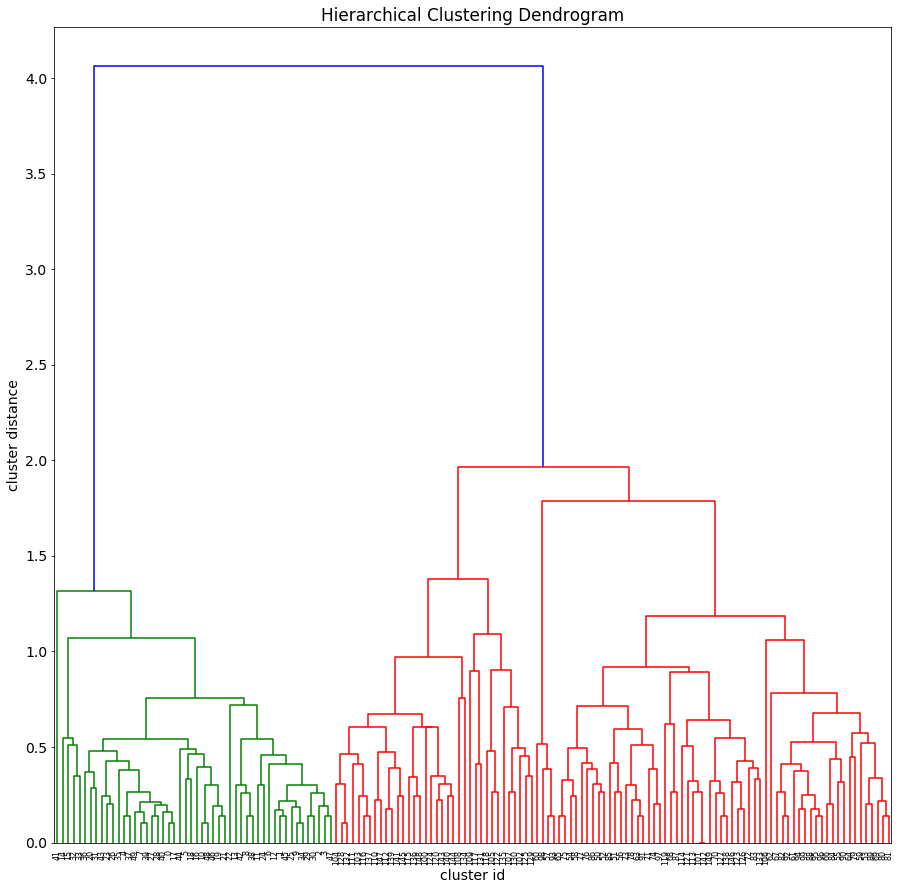

In [29]:
plt.figure(figsize=(15, 15))
plt.rc('font', size=14) 
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(dend, leaf_font_size=8)
plt.xlabel("cluster id")
plt.ylabel("cluster distance")
plt.show()

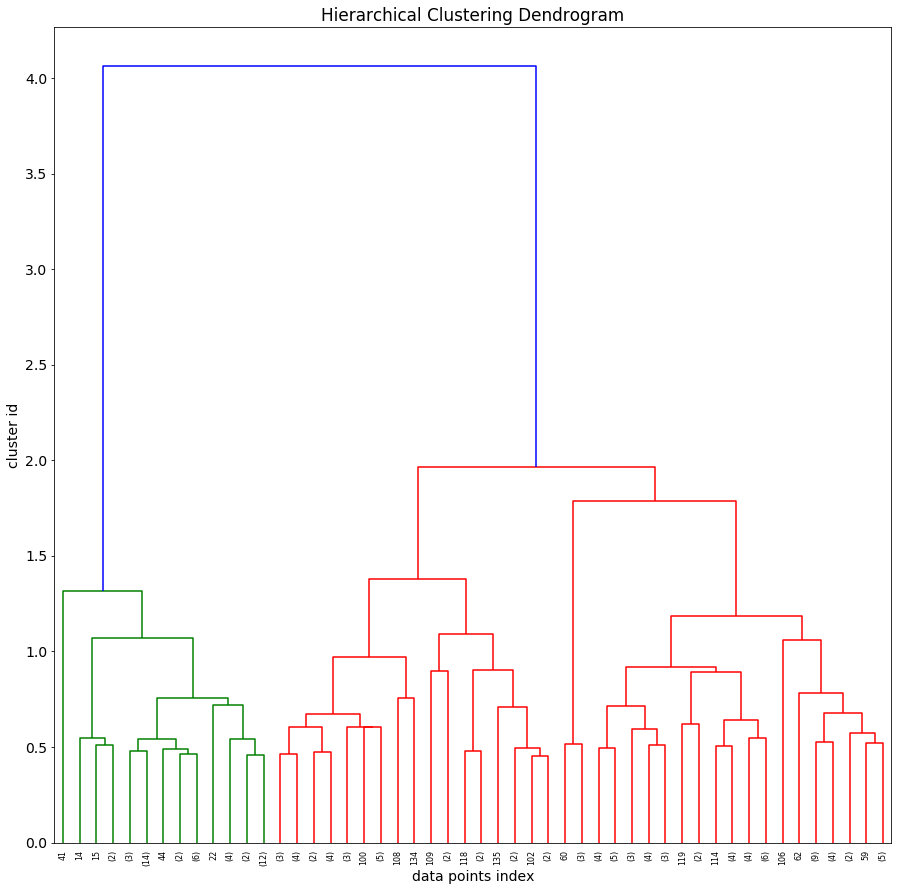

In [30]:
plt.figure(figsize=(15, 15))
plt.rc('font', size=14) 
plt.title("Hierarchical Clustering Dendrogram")
dendrogram(dend, truncate_mode='lastp', p=50, leaf_font_size=8)
plt.xlabel("data points index")
plt.ylabel("cluster id")
plt.show()

In [31]:
threshold = 1.8

cluster_label = fcluster(dend, threshold, criterion = 'distance') - 1
n_clusters = len(np.unique(cluster_label))
print('no. clusters:', n_clusters)

no. clusters: 3
